# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from IPython import get_ipython
import statsmodels.api as sm
from IPython.core.pylabtools import figsize


figsize(12, 8)
sns.set()

In [2]:
athletes = pd.read_csv("athletes.csv")

In [3]:
def get_sample(df, col_name, n=100, seed=42):
    """
    Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [4]:
def q1():
    sample = get_sample(athletes, col_name = 'height', n = 3000, seed = 42)
    # Hipótese nula de Shapiro: se p-value > alpha, a amostra é normalmente distribuída
    test, pval = sct.shapiro(sample)
    alpha = 0.05
    
    return pval > alpha # Se falso rejeitar hipótese nula


q1()

False

### __Para refletir__:

#### Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

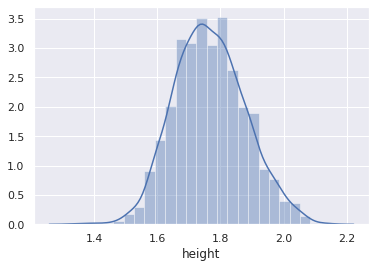

In [5]:
sample = get_sample(athletes, col_name='height', n = 3000, seed = 42)
sns.distplot(sample, bins = 25);

São condizentes, pois a distribuição, apesar de ser similar a de uma distro Normal, a nível de significância de 5% não pode ser considerada.

#### Plote o qq-plot para essa variável e a analise.

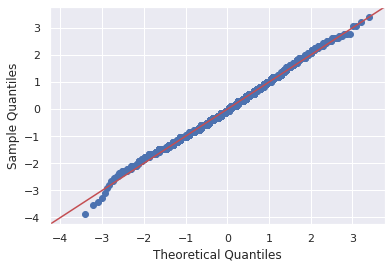

In [6]:
sm.qqplot(sample, fit = True, line = '45');

Pelo gráfico, observa-se que a maior parcela dos quantis da amostra são normalmente distribuídos.

#### Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

Precisaria ser abaixo do valor encontrado no teste

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [7]:
def q2():
    sample = get_sample(athletes, col_name = 'height', n = 3000, seed = 42)
    # Hipótese nula de Jarque-Bera: se p-value > alpha, a amostra tem skewness e kurtosis de uma normal
    test, pval = sct.shapiro(sample)
    alpha = 0.05
    
    return pval > alpha # Se falso rejeitar hipótese nula


q2()

False

### __Para refletir__:

#### Esse resultado faz sentido?

Faz sentido, pois a 5% de significância a distribuição não apresenta simetria e curtose de uma distro Normal

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [8]:
def q3():
    sample = get_sample(athletes, col_name = 'weight', n = 3000, seed = 42)
    # Hipótese nula de D'Agostino e Pearson: se pval > alpha, a amostra é normalmente distribuída 
    test, pval = sct.normaltest(sample)
    alpha = 0.05

    return bool(pval > alpha)


q3()

False

### __Para refletir__:

#### Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?


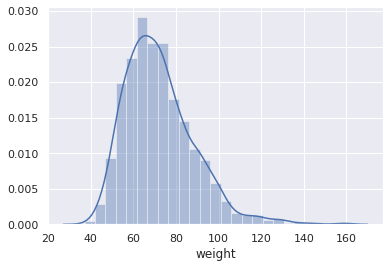

In [9]:
sample_weight = get_sample(athletes, col_name = 'weight', n = 3000, seed = 42)
sns.distplot(sample_weight, bins = 25);

São condizentes, pois pelo gráfico pode se observar que a amostra é leptocúrtica e tem assimetria positiva

#### Um _box plot_ também poderia ajudar a entender a resposta.

In [10]:
sample_weight.describe()

count    3000.000000
mean       72.122667
std        16.366742
min        37.000000
25%        60.000000
50%        70.000000
75%        81.000000
max       160.000000
Name: weight, dtype: float64

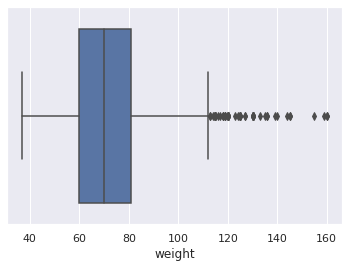

In [11]:
sns.boxplot(sample_weight);

Muitos outliers fora da Distribuição, mediana deslocada para a esquerda da média.

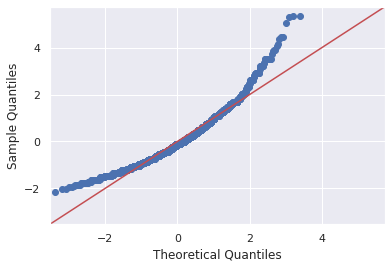

In [12]:
sm.qqplot(sample_weight, fit = True, line = '45');

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [13]:
log_sample_weight = np.log(sample_weight)

In [14]:
def q4():
    log_weight = np.log(
        get_sample(athletes, col_name = 'weight', n = 3000, seed = 42)
    )
    test, pval = sct.normaltest(log_weight)
    alpha = 0.05

    return bool(pval > alpha)


q4()

False

### __Para refletir__:
#### Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?


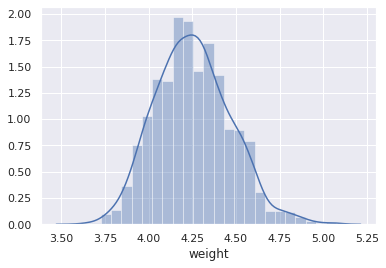

In [15]:
sns.distplot(log_sample_weight, bins = 25);

#### Você esperava um resultado diferente agora?

In [16]:
normal_test, normal_pval = sct.normaltest(sample_weight)
log_normal_test, log_normal_pval = sct.normaltest(log_sample_weight)

print(
    f'P-valor: {normal_pval}, \n'
    f'P-valor-log: {log_normal_pval}'
)

P-valor: 1.5898922918029537e-111, 
P-valor-log: 1.0705572101256944e-10


Pôde ser observado que o $p-value$ aumentou consideravelmente, porém a distribuição ainda não pode ser considerada oriunda de uma distribuição Normal com $\alpha=0.05$. Portanto, não se esperava um resultado diferente.

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

In [17]:
alpha = 0.05

In [18]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [19]:
selection = ['BRA', 'USA', 'CAN']
df = athletes[athletes.nationality.isin(selection)]
# df.nationality.unique()

In [20]:
bra = df[df.nationality == 'BRA']['height']
usa = df[df.nationality == 'USA']['height']
can = df[df.nationality == 'CAN']['height']

print(
    f'Médias: \n'
    f'BRASIL: {bra.mean():.4f}, USA: {usa.mean():.4f}, CANADA: {can.mean():.4f}'
)

Médias: 
BRASIL: 1.7640, USA: 1.7878, CANADA: 1.7586


## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [21]:
def fitTTest(val1='BRA', val2='USA', param='height', alpha=0.05):
    ## Return a dictionary of t-test outcome and p-value from t-test of 2 independent variables
    df1 = athletes[athletes.nationality == val1][param]
    df2 = athletes[athletes.nationality == val2][param]
    ttest, pval = sct.ttest_ind(df1, df2, equal_var=False, nan_policy='omit')

    return {'t-test': ttest, 'p-value': pval}

In [22]:
def q5():
    
    return bool(fitTTest('BRA', 'USA')['p-value'] > alpha)


q5()

False

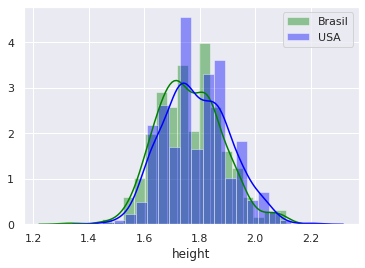

In [23]:
sns.distplot(bra.dropna(), label = 'Brasil', color = 'green')
sns.distplot(usa.dropna(), label = 'USA', color = 'blue')
plt.legend();

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [24]:
def q6():
    
    return bool(fitTTest('BRA', 'CAN')['p-value'] > alpha)


q6()

True

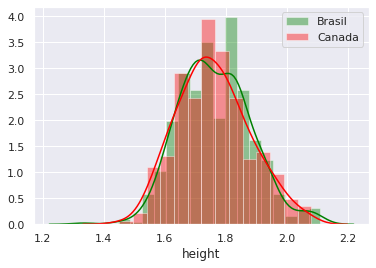

In [25]:
sns.distplot(bra.dropna(), label = 'Brasil', color = 'green')
sns.distplot(can.dropna(), label = 'Canada', color = 'red')
plt.legend();

Ambas distribuições são bastante similares, com $p-value > \alpha$

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [26]:
def q7():
    
    return float(round(fitTTest('USA', 'CAN')['p-value'], 8))


q7()

0.00046601

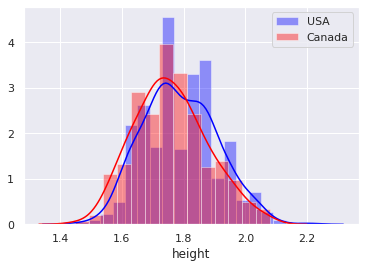

In [27]:
sns.distplot(usa.dropna(), label = 'USA', color = 'blue')
sns.distplot(can.dropna(), label = 'Canada', color = 'red')
plt.legend();

###__Para refletir__:
#### O resultado faz sentido?
#### Você consegue interpretar esse p-valor?
#### Você consegue chegar a esse valor de p-valor a partir da variável de estatística?